In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
train_data_chrome = pd.read_parquet(
    "../data/processed/chrome/08_12_2022/train_set_01_processed.parquet.gzip"
)
test_data_brave = pd.read_parquet(
    "../data/processed/brave/08_12_2022/test_set_all_processed.parquet.gzip"
)
test_data_firefox = pd.read_parquet(
    "../data/processed/firefox/08_12_2022/test_set_01_processed.parquet.gzip"
)

<AxesSubplot:xlabel='tracker', ylabel='Count'>

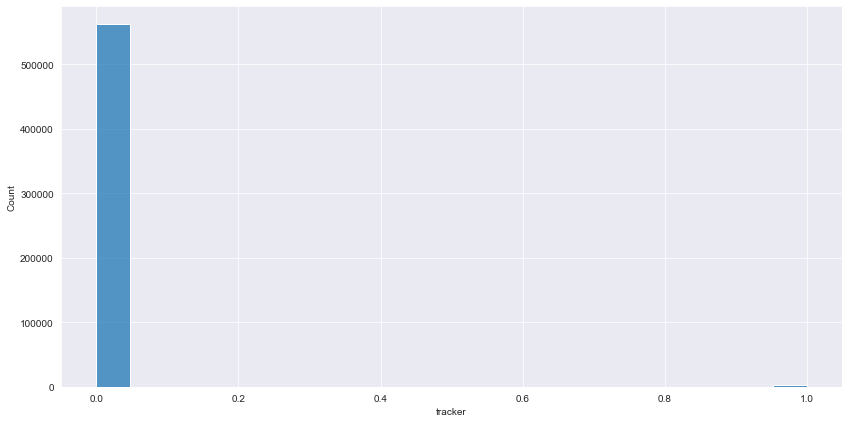

In [10]:
plt.figure(figsize=(14, 7))
sns.histplot(test_data_brave, x="tracker")

In [18]:
print(train_data_chrome.tracker.value_counts() / len(train_data_chrome))
print(test_data_firefox.tracker.value_counts() / len(test_data_firefox))
print(test_data_brave.tracker.value_counts() / len(test_data_brave))

0    0.715743
1    0.284257
Name: tracker, dtype: float64
0    0.712411
1    0.287589
Name: tracker, dtype: float64
0    0.994908
1    0.005092
Name: tracker, dtype: float64


In [20]:
train_data_chrome.dtypes

hostname                category
pathname                category
filetype                category
filename                category
pragma                  category
                          ...   
x-cdn-pop               category
x-cdn-pop-ip            category
tracker                    int32
comb_col_non_tracker       int64
comb_col_tracker           int64
Length: 157, dtype: object

<AxesSubplot:xlabel='x-goog-generation', ylabel='Proportion'>

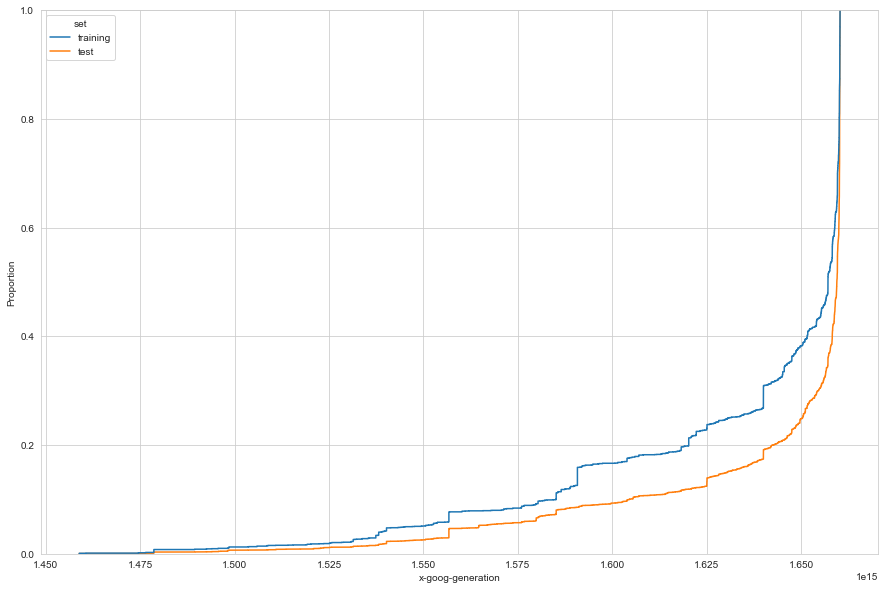

In [28]:
feature = 'x-goog-generation'
df = pd.DataFrame({
    feature: np.concatenate((train_data_chrome.loc[:, feature], test_data_brave.loc[:, feature])),
    'set': ['training'] * train_data_chrome.shape[0] + ['test'] * test_data_brave.shape[0]
})
plt.figure(figsize=(15, 10))
sns.ecdfplot(data=df, x=feature, hue='set', log_scale=False)